# Principal Component Analysis

---

## Exercise 1

Use the `Dry_Bean_Dataset.xlsx` available on the github page of the labs.

- Divide your dataset into a train and a test set.
- Preprocess the data by centering the variables and dividing them by their standard deviation.
- Write your own algorithm to perform PCA on the variables.
- Using the training set, obtain and plot the eigenvalue spectrum using the log-scale for the y-axis. What number of principal components would you select?
- Project the data (training set) in the first two principal components and color by class. Do it also for the three principal components.
- For an increasing number of principal components (1 to 16):
    - Apply a multinomial logistic regression to learn a model on the training
(use `sklearn.linear_model.LogisticRegression`).
    - Transform the test set with the matrix learned from the training set. Make a prediction with the logistic model learned.
    - Assess the quality of the predictions and comment on the results.

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Let's start by loading the dataset:

In [218]:
# Load the dataset
path = "../Datasets/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(path)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


Now let's split it in training and testing:

In [219]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Class to number
y_numerical, class_names = pd.factorize(y)

# Divide in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numerical, test_size=0.3, random_state=42, stratify=y_numerical
)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (9527, 16)
X_test:  (4084, 16)
y_train:  (9527,)
y_test:  (4084,)


To perform the PCA, data must be centered and scaled.

In [220]:
# Center and scale the data
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

In [221]:
def PCA(x):

    # Covariance matrix
    c = np.cov(x, rowvar=False)
    
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(c)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    return eigenvalues, eigenvectors

eigenvalues, principal_components = PCA(X_train)

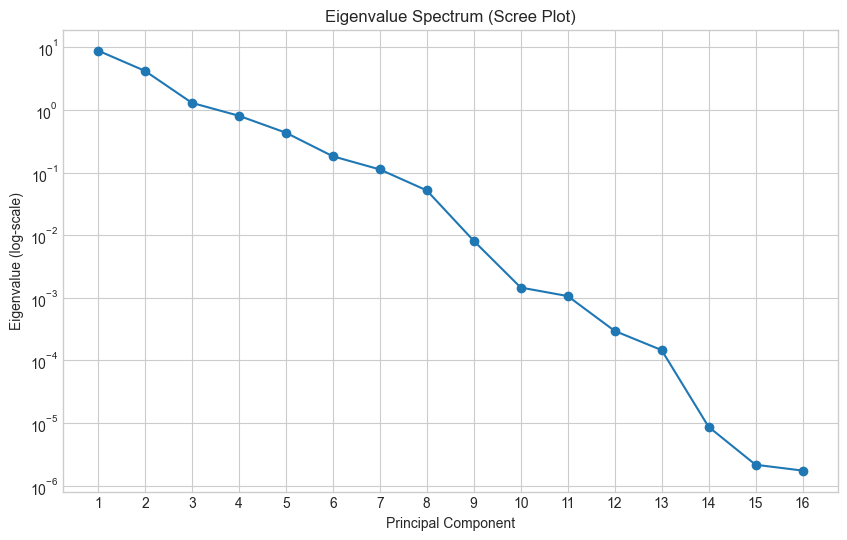

In [222]:
# Scree plot (eigenvalue spectrum)
def pca_scree_plot(eigenvalues):
    plt.figure(figsize=(10, 6))
    plt.semilogy(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue (log-scale)')
    plt.title('Eigenvalue Spectrum (Scree Plot)')
    plt.grid(True)
    plt.xticks(range(1, len(eigenvalues) + 1))
    plt.show()

pca_scree_plot(eigenvalues)

The plot shows the eigenvalue for each of the 16 principal components. Eigenvalues are a measure of how much variance (i.e., information) is captured by each component.

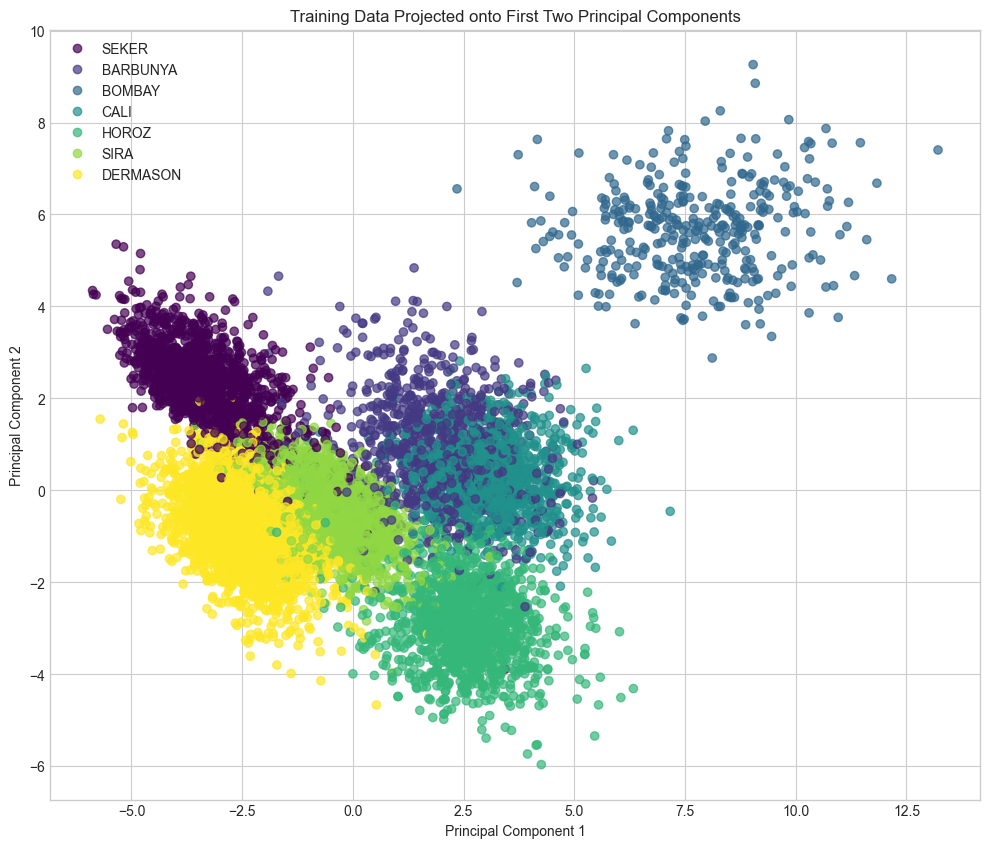

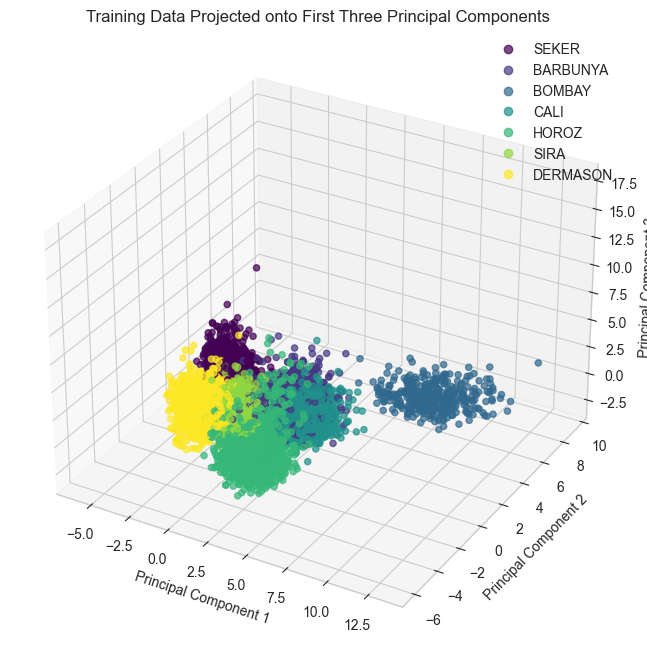

In [223]:
# Project onto the first two principal components
def project_2d(X, pc, color, class_names=None):
    W_2D = pc[:, :2]
    X_train_pca_2D = X.dot(W_2D)

    # 2D Projection Plot
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(X_train_pca_2D.iloc[:, 0], X_train_pca_2D.iloc[:, 1], c=color, cmap='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Training Data Projected onto First Two Principal Components')
    if class_names is not None:
        plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
    plt.grid(True)
    plt.show()


# Project onto the first three principal components
def project_3d(X, pc, color, class_names=None):
    W_3D = pc[:, :3]
    X_train_pca_3D = X.dot(W_3D)

    # 3D Projection Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter_3d = ax.scatter(X_train_pca_3D.iloc[:, 0], X_train_pca_3D.iloc[:, 1], X_train_pca_3D.iloc[:, 2], c=color, cmap='viridis', alpha=0.7)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Training Data Projected onto First Three Principal Components')
    if class_names is not None:
        ax.legend(handles=scatter_3d.legend_elements()[0], labels=class_names.tolist())
    plt.show()


project_2d(X=X_train, pc=principal_components, color=y_train, class_names=class_names)
project_3d(X=X_train, pc=principal_components, color=y_train, class_names=class_names)

These visualizations demonstrate that dimensionality reduction with PCA successfully clusters the data. While two components are sufficient to isolate a few classes, at least three principal components are necessary to achieve a more meaningful separation among all seven bean types. This suggests the data has a more complex structure than what can be represented in just two dimensions.

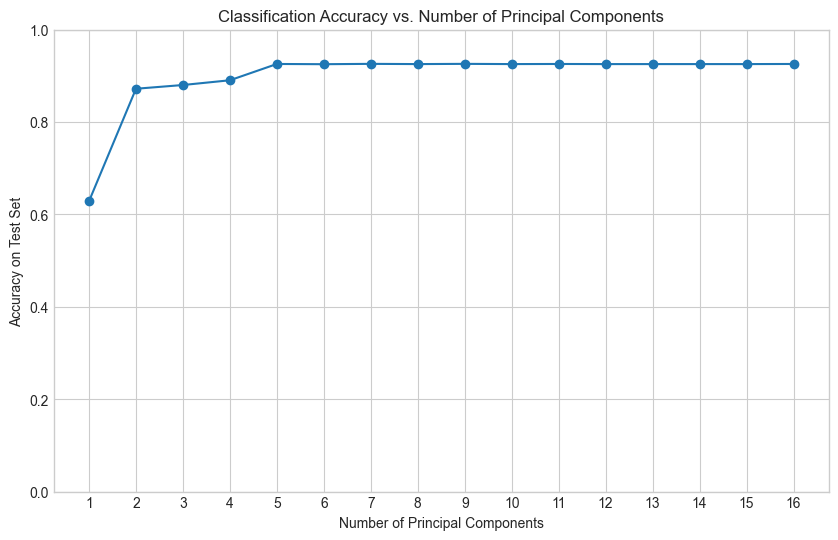

Components: 1, Test Accuracy: 0.6286
Components: 2, Test Accuracy: 0.8719
Components: 3, Test Accuracy: 0.8800
Components: 4, Test Accuracy: 0.8903
Components: 5, Test Accuracy: 0.9256
Components: 6, Test Accuracy: 0.9251
Components: 7, Test Accuracy: 0.9258
Components: 8, Test Accuracy: 0.9253
Components: 9, Test Accuracy: 0.9258
Components: 10, Test Accuracy: 0.9253
Components: 11, Test Accuracy: 0.9256
Components: 12, Test Accuracy: 0.9253
Components: 13, Test Accuracy: 0.9253
Components: 14, Test Accuracy: 0.9253
Components: 15, Test Accuracy: 0.9253
Components: 16, Test Accuracy: 0.9256


In [224]:
# Classification Performance vs. Number of Components
accuracies = []
n_components_range = range(1, X_train.shape[1] + 1)

for n_c in n_components_range:
    # Get the first n_c principal components
    W_transform = principal_components[:, :n_c]
    
    # Project training and test data
    X_train_proj = X_train.dot(W_transform)
    X_test_proj = X_test.dot(W_transform)
    
    # Train a multinomial logistic regression model
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
    log_reg.fit(X_train_proj, y_train)
    
    # Make predictions on the transformed test set
    y_pred = log_reg.predict(X_test_proj)
    
    # Calculate and store accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, accuracies, 'o-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy on Test Set')
plt.title('Classification Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.xticks(n_components_range)
plt.ylim(0, 1.0)
plt.show()

# Print final accuracies
for n, acc in zip(n_components_range, accuracies):
    print(f"Components: {n}, Test Accuracy: {acc:.4f}")


Based on the "elbow" where the curve flattens, the recommendation would be to use 5 or 6 principal components. This provides the best trade-off between model performance and complexity,

---

## Exercise 2

Try to apply PCA to the Swiss Roll dataset ($n = 1000$) from Lab 1 and plot the projection on the first two principal components. Choose an appropriate color scheme for visualization and comment on your results.

In [225]:
import plotly.graph_objects as go

In [226]:
# SWISS ROLL

# Sampling
n = 1000
phi = np.random.uniform(1.5*np.pi, 4.5*np.pi, n)
psi = np.random.uniform(0, 10, n)

# Coordinates
x = phi*np.cos(phi)
y = phi*np.sin(phi)
z = psi

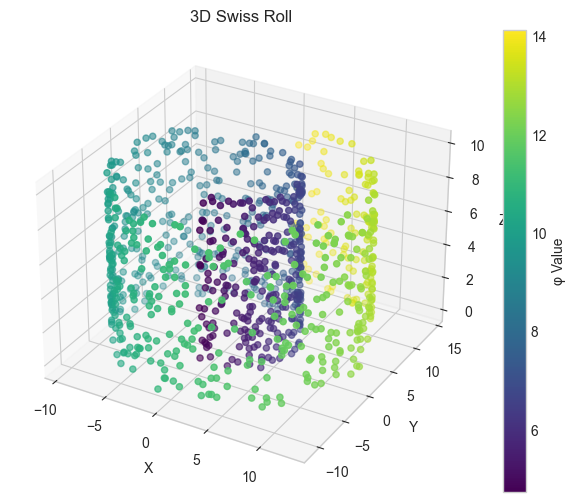

In [227]:
# Static 3d plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter3D(x, y, z, c=phi, cmap='viridis')
plt.colorbar(sc, ax=ax, label='φ Value')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Swiss Roll')

plt.show()


# Dynamic 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=phi,
        colorscale='Viridis',
        opacity=1,
        colorbar=dict(title="φ value")
    )
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z")
    ),
    title="3D Swiss Roll",
    margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()

In [228]:
# Create a dataframe from the coordinates
data = {
    'x': x,
    'y': y,
    'z': z
}
X = pd.DataFrame(data)
X

,x,y,z
0,11.817131,-3.370850,3.251105
1,9.038151,9.888504,3.751001
2,-9.415936,-2.073434,9.510229
3,-6.720634,-7.783289,5.491117
4,4.255889,-10.553056,1.561378
...,...,...,...
995,-5.665238,-8.746320,0.003036
996,3.470406,6.494071,7.236647
997,-8.462387,-5.298258,8.078642
998,-5.718999,6.400365,2.597662


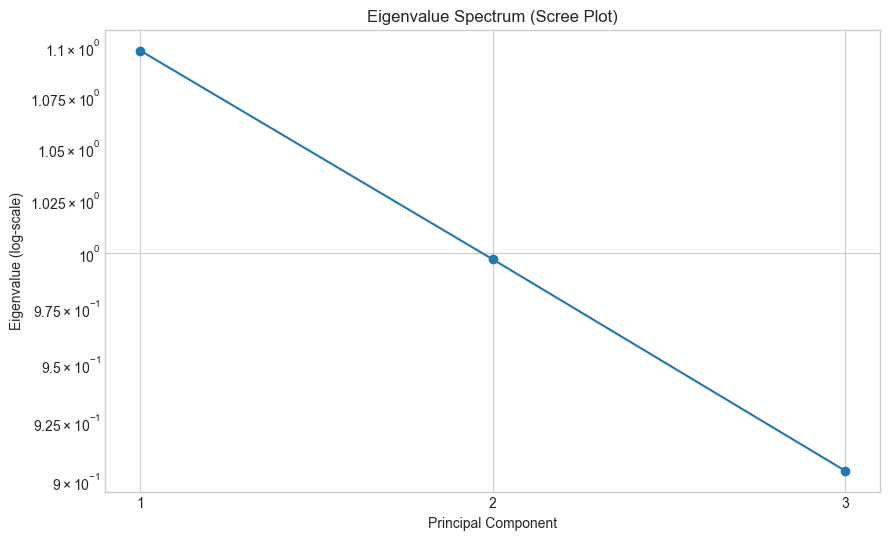

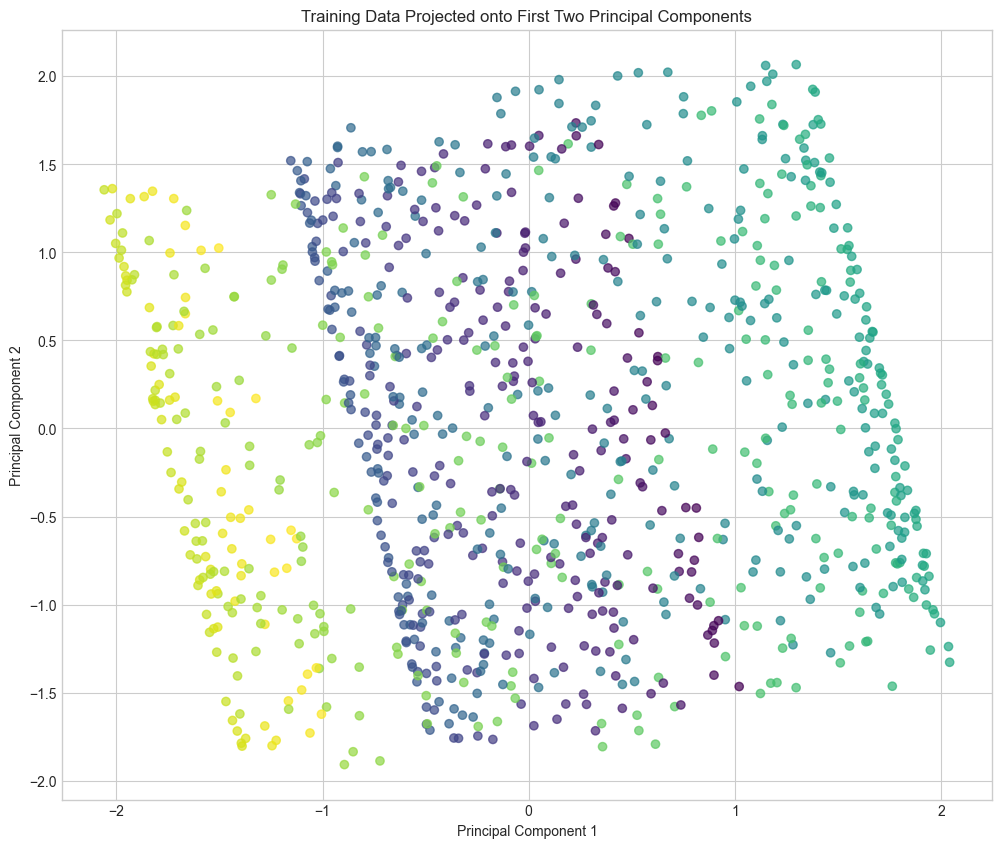

In [231]:
# Center and scale the data
X = (X - X.mean()) / X.std()

# PCA
eigenvalues, principal_components = PCA(X)

# Scree plot
pca_scree_plot(eigenvalues)

# 2D Projection
project_2d(X=X, pc=principal_components, color=phi)


PCA finds the 2D viewing angle that preserves the most variance and squashes the data flat. The resulting projection loses the essential structure of the data. This shows that PCA is the wrong tool for understanding the intrinsic structure of non-linear datasets like the Swiss Roll.